In [1]:
# standard 
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='darkgrid')

#scikit-learn | ML 
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

 ## models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

  ## metrics
from sklearn.metrics import (classification_report, accuracy_score, f1_score, 
                             confusion_matrix, roc_curve, auc, RocCurveDisplay)

In [2]:
# all datasets df => train , test_df => test, ss => sample subm
df = pd.read_csv("../input/aviakompaniya/train_dataset.csv")
test_df = pd.read_csv("../input/aviakompaniya/test_dataset.csv")
ss = pd.read_csv("../input/aviakompaniya/sample_submission.csv")

df.T[range(0, 10)]

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
Gender,Male,Female,Female,Female,Male,Male,Male,Female,Male,Female
Customer Type,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,disloyal Customer
Age,33,49,43,27,11,30,38,39,43,24
Type of Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco,Eco Plus,Eco,Eco Plus,Business,Eco
Flight Distance,571,1431,867,1550,526,1034,826,162,541,1065
Inflight wifi service,2,4,1,3,3,2,5,3,2,4
Departure/Arrival time convenient,3,1,4,3,4,4,1,4,2,4
Ease of Online booking,2,4,4,3,3,2,1,4,2,4


In [3]:
print('Shape', test_df.shape)
test_df.head()

Shape (4000, 23)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [4]:
print('Shape', ss.shape)
ss.head()

Shape (4000, 2)


,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# **Analyze**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [6]:
# matnli ustunlar
CAT_COLS = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for i in CAT_COLS:
    print(i + '=>',  df[i].unique(), '== ' + str(len(df[i].unique())))

Gender=> ['Male' 'Female'] == 2
Customer Type=> ['disloyal Customer' 'Loyal Customer'] == 2
Type of Travel=> ['Business travel' 'Personal Travel'] == 2
Class=> ['Eco' 'Business' 'Eco Plus'] == 3


In [7]:
df_org = df.copy()

GENDER = {'Male': 1, 'Female': 0}
CUSTOMER_TYPE = {'Loyal Customer':1, 'disloyal Customer':0}
TYPE_OF_TRAVEL = {'Business travel':1, 'Personal Travel':0}
CLASS = {'Business':2, 'Eco Plus':1, 'Eco':0}

df['Gender'] = df['Gender'].map(GENDER)
df['Customer Type'] = df['Customer Type'].map(CUSTOMER_TYPE)
df['Type of Travel'] = df['Type of Travel'].map(TYPE_OF_TRAVEL)
df['Class'] = df['Class'].map(CLASS)

In [8]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,0,33,1,0,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0,1,49,1,2,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0,1,43,1,0,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0,1,27,1,2,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1,1,11,0,0,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


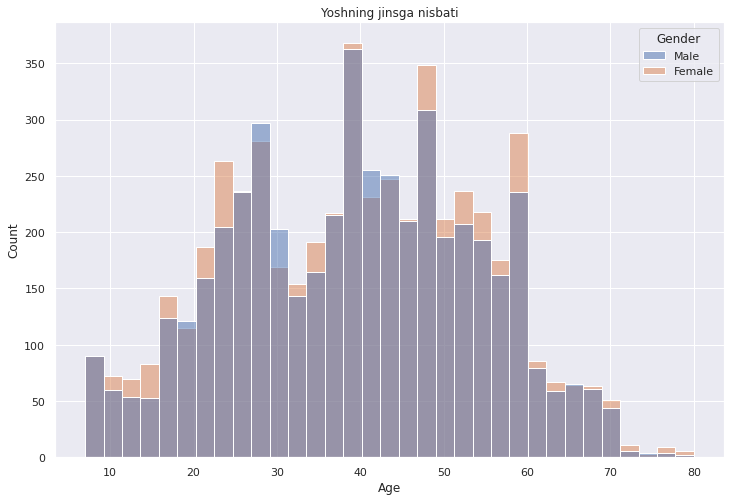

In [9]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_org, x='Age', hue='Gender')
plt.title("Yoshning jinsga nisbati");

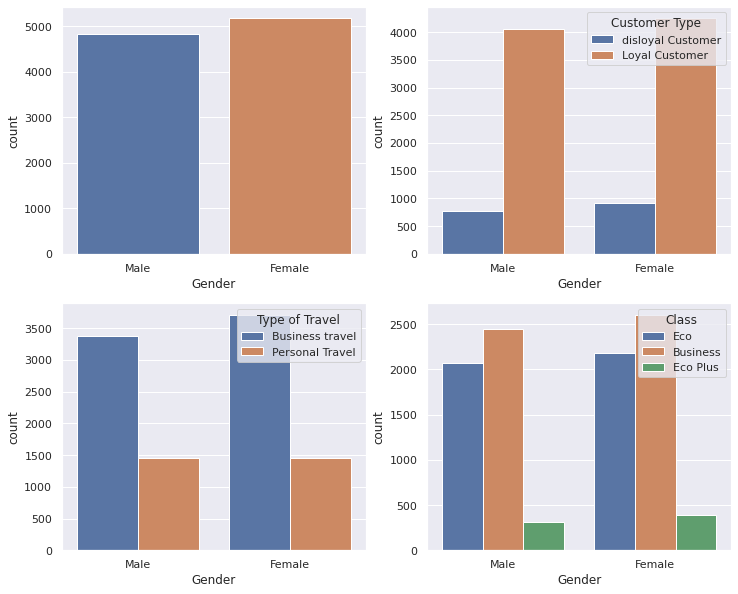

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(ax=ax[0, 0], data=df_org, x='Gender')
sns.countplot(ax=ax[0, 1], data=df_org, x='Gender', hue='Customer Type')
sns.countplot(ax=ax[1, 0], data=df_org, x='Gender', hue='Type of Travel')
sns.countplot(ax=ax[1, 1], data=df_org, x='Gender', hue='Class');

In [11]:
# korelyatsiya
df.drop('id', axis=1, inplace=True)
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)*100

satisfaction                         100.000000
Class                                 51.893105
Online boarding                       50.498562
Type of Travel                        48.226628
Inflight entertainment                40.089954
Seat comfort                          34.229377
On-board service                      32.642642
Leg room service                      32.436790
Cleanliness                           31.033803
Flight Distance                       29.870298
Inflight wifi service                 27.739521
Baggage handling                      24.796452
Inflight service                      24.058363
Checkin service                       23.235876
Food and drink                        20.785353
Customer Type                         18.159192
Ease of Online booking                16.466159
Age                                   14.430214
Departure/Arrival time convenient      6.763835
Arrival Delay in Minutes               4.864993
Departure Delay in Minutes             4

# **Machine Learning**

In [12]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for tr_idx, te_idx in strat_split.split(df, df['Gender']):
    st_trainset = df.iloc[tr_idx]
    st_testset = df.iloc[te_idx]

In [13]:
print(st_trainset.shape)
st_trainset.head()

(8000, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7636,1,1,24,1,0,679,5,2,2,2,...,5,4,5,2,4,3,5,0,12.0,1
8132,0,1,68,1,2,2710,2,2,2,2,...,5,5,5,5,3,5,2,3,15.0,1
7048,0,0,23,1,0,692,1,1,1,3,...,4,3,4,4,5,4,4,1,2.0,0
6650,1,1,37,1,2,328,2,2,2,2,...,2,2,2,2,1,2,4,19,22.0,0
4763,0,1,44,1,2,613,2,2,2,2,...,5,5,5,5,5,5,4,0,0.0,1


In [14]:
print(st_testset.shape)
st_testset.head()

(2000, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1890,0,0,38,1,2,417,5,5,5,5,...,2,4,5,4,4,5,2,0,0.0,1
9959,0,1,60,1,2,2586,2,5,5,5,...,3,1,4,4,2,1,2,0,0.0,0
4663,0,1,66,1,0,331,4,5,5,5,...,3,3,4,3,2,3,3,0,0.0,1
5706,0,1,43,0,0,1444,0,0,0,2,...,3,3,0,3,5,3,4,13,2.0,1
9923,1,1,43,1,2,3892,4,4,4,4,...,5,5,5,5,4,5,4,0,1.0,1


In [15]:
X_train = st_trainset.drop('satisfaction', axis=1)
y_train = st_trainset['satisfaction'].copy()

X_test = st_testset.drop('satisfaction', axis=1)
y_test = st_testset['satisfaction'].copy()

## **Pipeline**

In [16]:
pipeline = Pipeline([
            ('median_imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler())
])

X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

## **k-NN**

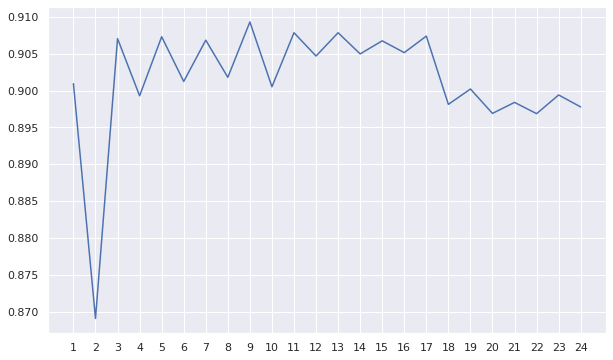

In [17]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train_prepared, y_train)
    y_predicted = knn.predict(X_test_prepared)
    f1.append(f1_score(y_test, y_predicted))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       963
           1       0.95      0.87      0.91      1037

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Model aniqligi: 0.9095


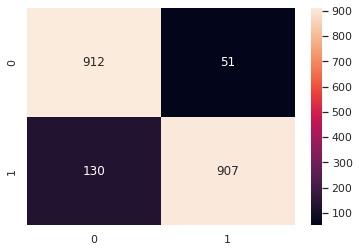

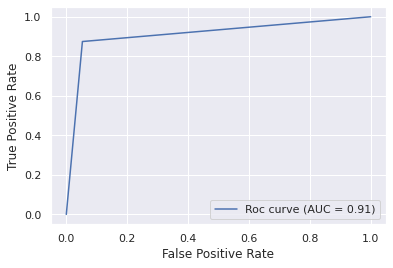

In [18]:
kNN_model = KNeighborsClassifier(n_neighbors=9)
kNN_model.fit(X_train_prepared, y_train)

knn_y_predicted = kNN_model.predict(X_test_prepared)

print(classification_report(y_test, knn_y_predicted))
print("Model aniqligi:", accuracy_score(y_test, knn_y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, knn_y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_y_predicted)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
disp.plot();

# **Logistic Regression**

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       963
           1       0.87      0.85      0.86      1037

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Model aniqligi: 0.8575


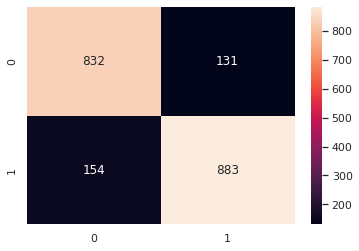

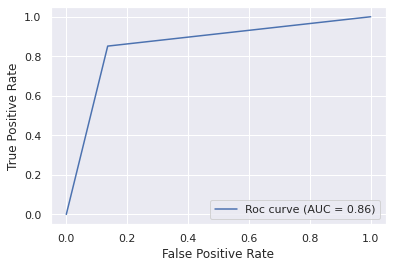

In [19]:
LR_model = LogisticRegression()
LR_model.fit(X_train_prepared, y_train)

lr_y_predicted = LR_model.predict(X_test_prepared)

print(classification_report(y_test, lr_y_predicted))
print("Model aniqligi:", accuracy_score(y_test, lr_y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, lr_y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_y_predicted)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
disp.plot();

# **Support Vector Machine**

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       963
           1       0.94      0.93      0.94      1037

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.935


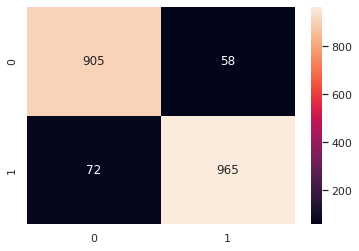

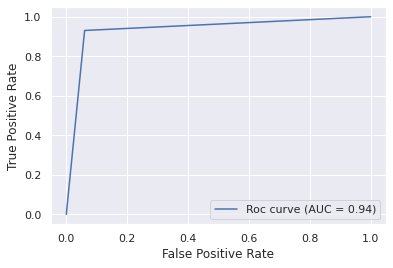

In [20]:
SVM_model = SVC()
SVM_model.fit(X_train_prepared, y_train)

svm_y_predicted = SVM_model.predict(X_test_prepared)

print(classification_report(y_test, svm_y_predicted))
print("Model aniqligi:", accuracy_score(y_test, svm_y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, svm_y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_y_predicted)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
disp.plot();

# **Desicion Tree**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       963
           1       0.93      0.93      0.93      1037

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.93


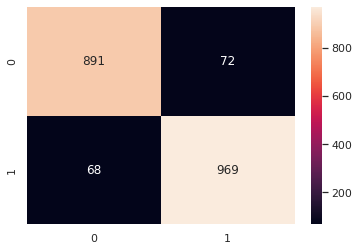

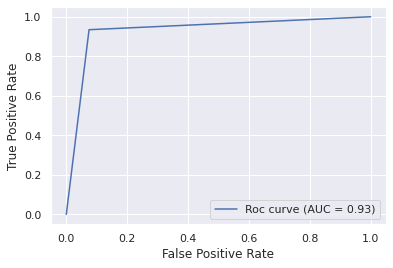

In [21]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train_prepared, y_train)

dtc_y_predicted = DTC_model.predict(X_test_prepared)

print(classification_report(y_test, dtc_y_predicted))
print("Model aniqligi:", accuracy_score(y_test, dtc_y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, dtc_y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtc_y_predicted)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
disp.plot();

# **Random Forest**

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       963
           1       0.95      0.94      0.95      1037

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9435


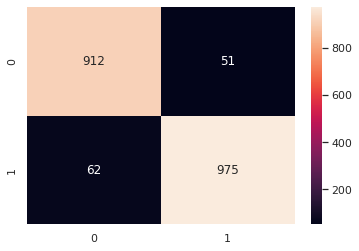

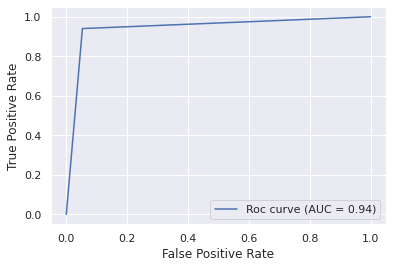

In [22]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train_prepared, y_train)

rfc_y_predicted = RFC_model.predict(X_test_prepared)

print(classification_report(y_test, rfc_y_predicted))
print("Model aniqligi:", accuracy_score(y_test, rfc_y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, rfc_y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_predicted)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
disp.plot();

# **XGB**

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       963
           1       0.95      0.94      0.94      1037

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9415


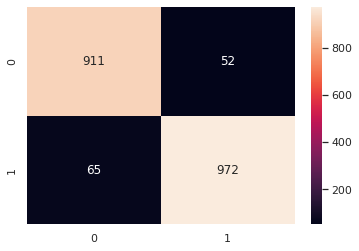

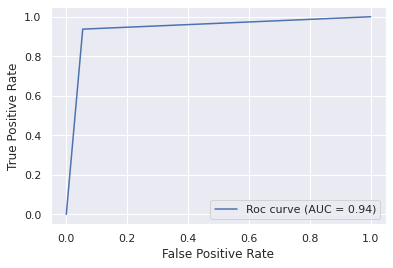

In [23]:
XGB_model = XGBClassifier(n_estimators=9)
XGB_model.fit(X_train_prepared, y_train)

xgb_y_predicted = XGB_model.predict(X_test_prepared)

print(classification_report(y_test, xgb_y_predicted))
print("Model aniqligi:", accuracy_score(y_test, xgb_y_predicted))

# Confusion matrix
conf_mat = confusion_matrix(y_test, xgb_y_predicted)
sns.heatmap(conf_mat, annot=True, fmt="g");

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_predicted)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
disp.plot();

# **Submission**

In [24]:
test_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [25]:
test_df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [26]:
test_df.drop('id', axis=1, inplace=True)

test_df['Gender'] = test_df['Gender'].map(GENDER)
test_df['Customer Type'] = test_df['Customer Type'].map(CUSTOMER_TYPE)
test_df['Type of Travel'] = test_df['Type of Travel'].map(TYPE_OF_TRAVEL)
test_df['Class'] = test_df['Class'].map(CLASS)

In [27]:
forsub = pipeline.transform(test_df)

rfc_sub_predicted = RFC_model.predict(forsub)

print(len(rfc_sub_predicted))

ss['satisfaction'] = rfc_sub_predicted

ss.to_csv("submission.csv", index=False)

4000
